In [2]:
# Import essential libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

import statsmodels.api as sm

In [3]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the Dataset
data=pd.read_csv(r"C:\Users\ratna\Downloads\EV_cars.csv")

In [5]:
data

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4
...,...,...,...,...,...,...,...,...,...
355,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1
356,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1
357,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1
358,68.0,Opel Zafira-e Life M 75 kWh,https://ev-database.org/car/1348/Opel-Zafira-e...,257,290.0,69250.0,265,130,13.3


In [6]:
#Display first 5 row of the dataset
data.head()


,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [7]:
# Display the all the columns of the dataset
data.columns

Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [8]:
# Show total number of the rows and columns
data.shape

(360, 9)

In [9]:
# Show total number of the rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery               360 non-null    float64
 1   Car_name              360 non-null    object 
 2   Car_name_link         360 non-null    object 
 3   Efficiency            360 non-null    int64  
 4   Fast_charge           358 non-null    float64
 5   Price.DE.             309 non-null    float64
 6   Range                 360 non-null    int64  
 7   Top_speed             360 non-null    int64  
 8   acceleration..0.100.  360 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 25.4+ KB


In [10]:
# Rename the column name for easier manipulation
data.rename({'Fast_charge':'FastCharge',
             'Price.DE.':'Price',
             'Top_speed':'TopSpeed',
             'acceleration..0.100.':'AccelerationTime'},axis=1,inplace=True)

data.head()

,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [11]:
# Detect the Missing value
data.isnull().sum()

Battery              0
Car_name             0
Car_name_link        0
Efficiency           0
FastCharge           2
Price               51
Range                0
TopSpeed             0
AccelerationTime     0
dtype: int64

In [12]:
# Display the duplicate
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
355    False
356    False
357    False
358    False
359    False
Length: 360, dtype: bool


In [13]:
# Display the unique value
data['Range'].unique()

array([435, 420, 330, 360, 505, 350, 370, 250, 485, 515, 380, 390, 415,
       385, 455, 560, 235, 475, 575, 340, 165, 450, 305, 405, 510, 280,
       335, 410, 300, 400, 500, 315, 425, 285, 135, 180, 430, 440, 495,
       310, 345, 295, 290, 465, 685, 520, 255, 470, 365, 260, 320, 635,
       530, 170, 245, 535, 525, 355, 160, 480, 665, 490, 265, 445, 580,
       270, 590, 220, 395, 205, 610, 200, 460, 225, 150, 210, 230, 185],
      dtype=int64)

In [14]:

#There are some duplicate cars in dataset
data.Car_name.value_counts()

Car_name
Mercedes EQB 300 4MATIC        2
Mini Cooper SE                 2
Mercedes EQE SUV 500 4MATIC    2
Mercedes EQA 300 4MATIC        2
Mercedes EQA 250+              2
                              ..
MG Marvel R                    1
Smart #3                       1
Fiat 600e                      1
BMW iX M60                     1
Fiat E-Ulysse L3 50 kWh        1
Name: count, Length: 351, dtype: int64

In [15]:
# Display the duplicate cars
display(data[data['Car_name']=='Mini Cooper SE'])
display(data[data['Car_name']=='Mercedes EQB 300 4MATIC'])
display(data[data['Car_name']=='Mercedes EQE SUV 500 4MATIC'])
display(data[data['Car_name']=='Mercedes EQB 300 4MATIC'])
display(data[data['Car_name']=='Mercedes EQA 300 4MATIC'])

,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
52,28.9,Mini Cooper SE,https://ev-database.org/car/1409/Mini-Cooper-SE,161,260.0,35700.0,180,150,7.3
161,49.0,Mini Cooper SE,https://ev-database.org/car/1998/Mini-Cooper-SE,158,440.0,36900.0,310,170,6.7


,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
111,66.5,Mercedes EQB 300 4MATIC,https://ev-database.org/car/1559/Mercedes-EQB-...,196,490.0,NaN,340,160,8.0
241,66.5,Mercedes EQB 300 4MATIC,https://ev-database.org/car/1989/Mercedes-EQB-...,193,500.0,55519.0,345,160,8.0


,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
160,96.0,Mercedes EQE SUV 500 4MATIC,https://ev-database.org/car/2048/Mercedes-EQE-...,211,630.0,99841.0,455,210,4.9
203,90.6,Mercedes EQE SUV 500 4MATIC,https://ev-database.org/car/1762/Mercedes-EQE-...,208,650.0,NaN,435,210,4.9


,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
111,66.5,Mercedes EQB 300 4MATIC,https://ev-database.org/car/1559/Mercedes-EQB-...,196,490.0,NaN,340,160,8.0
241,66.5,Mercedes EQB 300 4MATIC,https://ev-database.org/car/1989/Mercedes-EQB-...,193,500.0,55519.0,345,160,8.0


,Battery,Car_name,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
201,66.5,Mercedes EQA 300 4MATIC,https://ev-database.org/car/1495/Mercedes-EQA-...,190,500.0,NaN,350,160,7.7
292,66.5,Mercedes EQA 300 4MATIC,https://ev-database.org/car/1986/Mercedes-EQA-...,187,510.0,53520.0,355,160,7.7


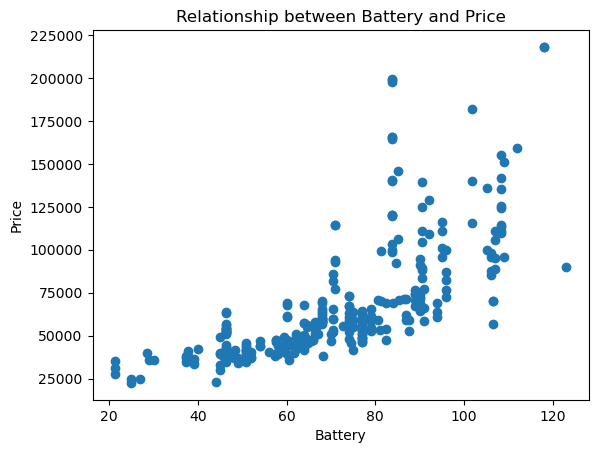

In [16]:

# visualize the distribution of each feature in the dataset
# Scatter plot of Battery vs price
plt.scatter(data['Battery'], data['Price'])
plt.xlabel('Battery')
plt.ylabel('Price')
plt.title('Relationship between Battery and Price')
plt.show()

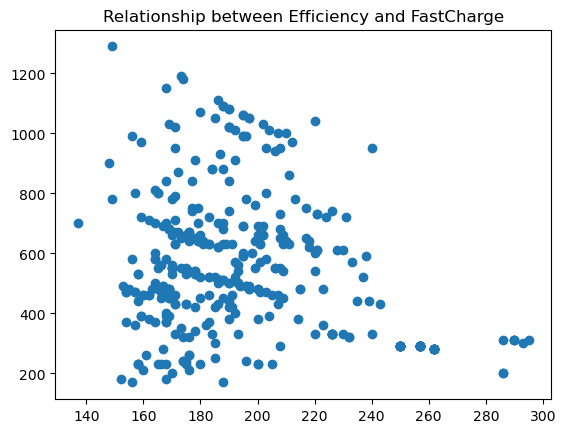

In [17]:
# Scatter plot between Efficiency and FastCharge
plt.scatter(data['Efficiency'],data['FastCharge'])
#plt.xlabel('FastCharge')
#plt.ylabel('Efficiency')
plt.title('Relationship between Efficiency and FastCharge')
plt.show()

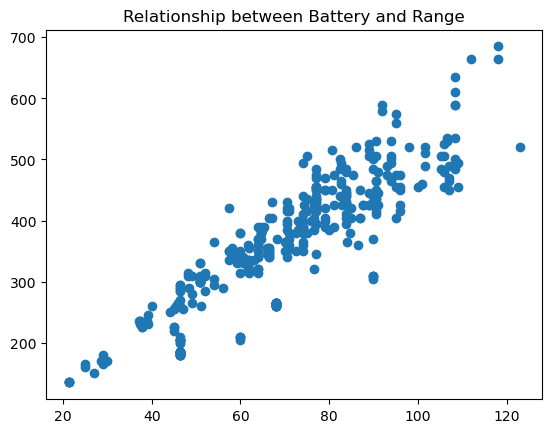

In [18]:
# Scatter plot between Battery and range
plt.scatter(x=data['Battery'], y=data['Range'])
#plt.xlabel=('Battery')
#plt.ylabel=('Range')
plt.title('Relationship between Battery and Range')
plt.show()

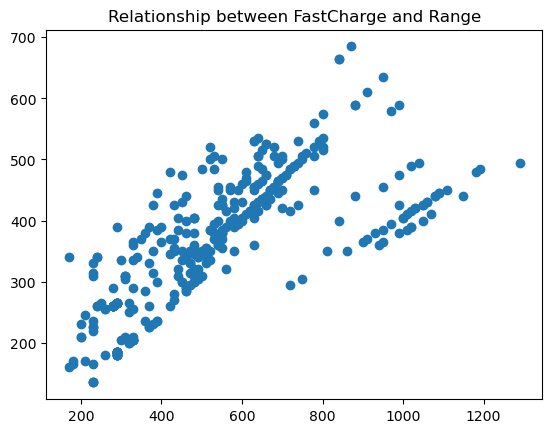

In [19]:
# Scatter plot between FastCharge and range
plt.scatter(x=data['FastCharge'], y=data['Range'])
#plt.xlabel=('FastCharge')
#plt.ylabel=('Range')
plt.title('Relationship between FastCharge and Range')
plt.show()

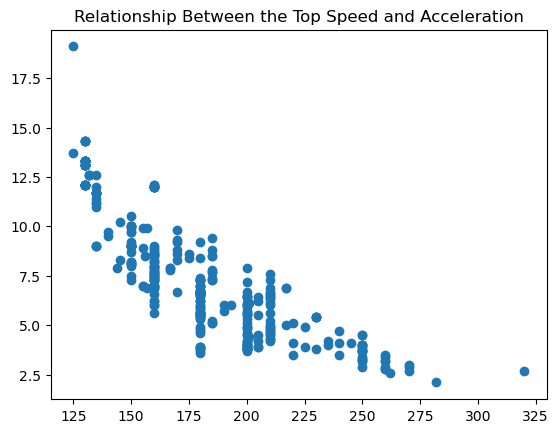

In [20]:
# Scatter plot between Top speed and Acceleration 
plt.scatter(x=data['TopSpeed'], y=data['AccelerationTime'])
#plt.xlabel('TopSpeed')
#plt.ylabel('AccelerationTime')
plt.title('Relationship Between the Top Speed and Acceleration')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

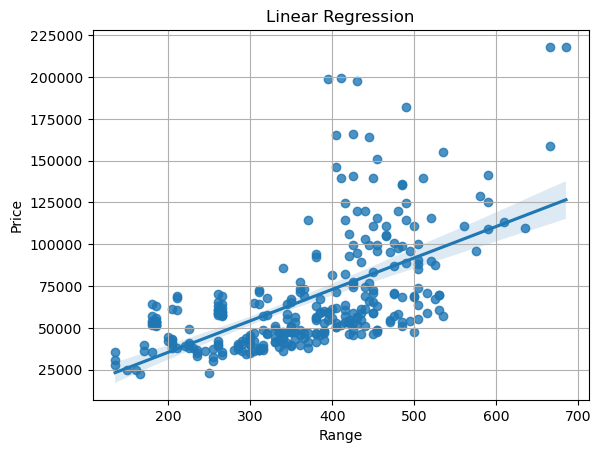

In [21]:
sns.regplot(x=data['Range'], y=data['Price'])
plt.grid(True)
plt.title('Linear Regression')
plt.show

Efficiency
257    15
190    12
171    11
169    11
168    11
       ..
161     1
189     1
152     1
243     1
293     1
Name: count, Length: 92, dtype: int64


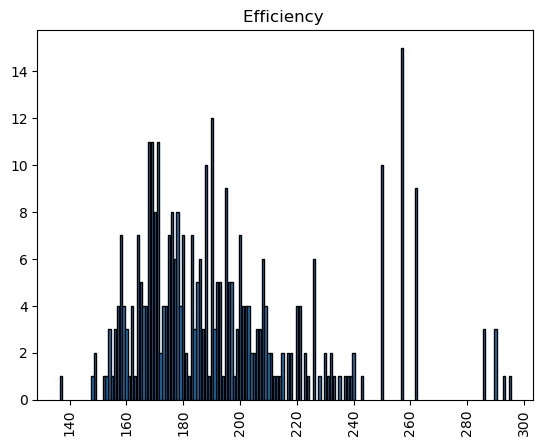

In [22]:
frequency_table=data['Efficiency'].value_counts()
print(frequency_table)

#Create a bar plot
plt.bar(frequency_table.index, frequency_table.values, edgecolor='black')

#Set chat title and axis labels
#plt.xlabel('Efficiency')
#plt.ylabel('Frequency')
plt.title('Efficiency ')

#Rotate x axis at 90 degree
plt.xticks(rotation=90)
plt.show()

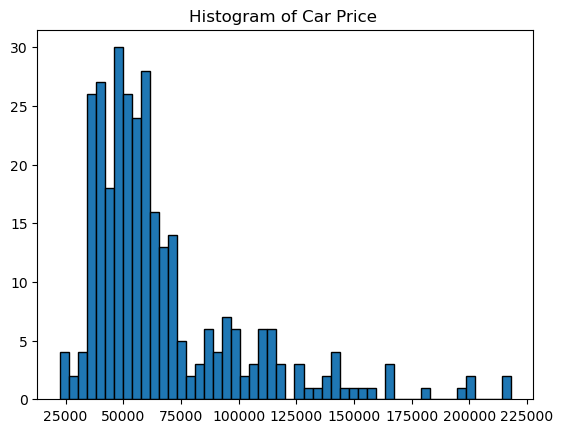

In [23]:
# Create a Histogram based on the Price
plt.hist(data['Price'], bins=50, edgecolor='black')

# Set the plot label and title
#plt.xlabel('Price')
#plt.ylabel('Frequency')
plt.title('Histogram of Car Price ')
plt.show()

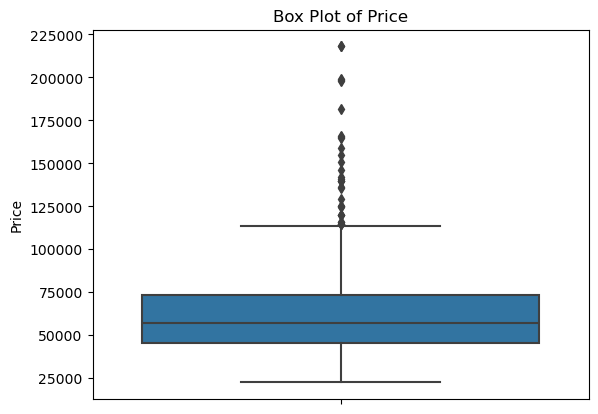

In [24]:
#Display Boxplot
sns.boxplot(y=data['Price'])
plt.title('Box Plot of Price')
plt.show()

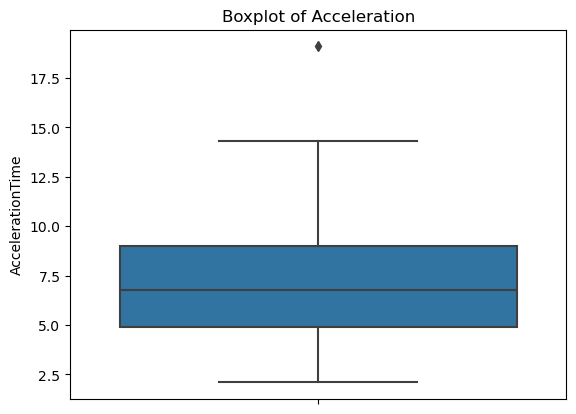

In [25]:
sns.boxplot(data=data, y='AccelerationTime')
plt.xticks(rotation=90)
plt.title('Boxplot of Acceleration')
plt.show()

In [26]:
data.corr(numeric_only=True)

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
Battery,1.000000,0.177427,0.597290,0.704391,0.881937,0.698193,-0.610164
Efficiency,0.177427,1.000000,-0.280822,0.179422,-0.282097,-0.176437,0.389531
FastCharge,0.597290,-0.280822,1.000000,0.618951,0.720674,0.775925,-0.671587
Price,0.704391,0.179422,0.618951,1.000000,0.594143,0.762891,-0.537712
Range,0.881937,-0.282097,0.720674,0.594143,1.000000,0.744192,-0.744583
TopSpeed,0.698193,-0.176437,0.775925,0.762891,0.744192,1.000000,-0.839394
AccelerationTime,-0.610164,0.389531,-0.671587,-0.537712,-0.744583,-0.839394,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

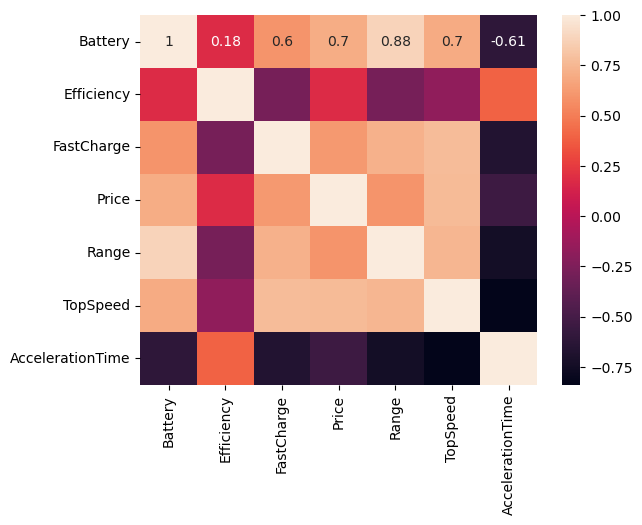

In [27]:
# plot Heatmap
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show

In [28]:
 #Measure Strenth of depedence between two variable
data.corr(method='kendall',numeric_only=True)

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
Battery,1.000000,0.222183,0.488655,0.653436,0.724466,0.575775,-0.478964
Efficiency,0.222183,1.000000,-0.120782,0.318228,-0.069771,0.021350,0.002011
FastCharge,0.488655,-0.120782,1.000000,0.422015,0.622775,0.632250,-0.525374
Price,0.653436,0.318228,0.422015,1.000000,0.469803,0.533362,-0.438738
Range,0.724466,-0.069771,0.622775,0.469803,1.000000,0.619990,-0.531290
TopSpeed,0.575775,0.021350,0.632250,0.533362,0.619990,1.000000,-0.730297
AccelerationTime,-0.478964,0.002011,-0.525374,-0.438738,-0.531290,-0.730297,1.000000


In [29]:
# Measure the Strength of the linear relationship between two variables
data.corr(method='pearson',numeric_only=True)

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
Battery,1.000000,0.177427,0.597290,0.704391,0.881937,0.698193,-0.610164
Efficiency,0.177427,1.000000,-0.280822,0.179422,-0.282097,-0.176437,0.389531
FastCharge,0.597290,-0.280822,1.000000,0.618951,0.720674,0.775925,-0.671587
Price,0.704391,0.179422,0.618951,1.000000,0.594143,0.762891,-0.537712
Range,0.881937,-0.282097,0.720674,0.594143,1.000000,0.744192,-0.744583
TopSpeed,0.698193,-0.176437,0.775925,0.762891,0.744192,1.000000,-0.839394
AccelerationTime,-0.610164,0.389531,-0.671587,-0.537712,-0.744583,-0.839394,1.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Battery           360 non-null    float64
 1   Car_name          360 non-null    object 
 2   Car_name_link     360 non-null    object 
 3   Efficiency        360 non-null    int64  
 4   FastCharge        358 non-null    float64
 5   Price             309 non-null    float64
 6   Range             360 non-null    int64  
 7   TopSpeed          360 non-null    int64  
 8   AccelerationTime  360 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 25.4+ KB


In [31]:
data.drop(columns=['Car_name'],inplace=True)
data.head()

,Battery,Car_name_link,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
0,75.0,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [32]:
data.drop(columns=['Car_name_link'],inplace=True)
data.head()

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
0,75.0,172,670.0,59017.0,435,217,5.0
1,57.5,137,700.0,46220.0,420,201,6.1
2,60.5,183,370.0,44625.0,330,160,7.3
3,61.7,171,630.0,39990.0,360,160,7.9
4,75.0,149,780.0,55220.0,505,201,4.4


In [33]:
# It remove all the NaN value
data.dropna(how="any", inplace=True)        

In [34]:
data.describe()

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,71.386319,195.586319,552.833876,67529.882736,370.602606,181.429967,7.275896
std,20.363656,32.672692,240.318651,34462.344923,107.870255,36.479166,3.087695
min,21.300000,137.000000,170.000000,22550.000000,135.000000,125.000000,2.100000
25%,57.500000,171.000000,335.000000,45867.500000,297.500000,155.000000,4.800000
50%,70.500000,188.000000,520.000000,56950.000000,380.000000,180.000000,6.700000
75%,85.000000,209.500000,680.000000,73624.500000,447.500000,200.500000,9.000000
max,123.000000,295.000000,1290.000000,218000.000000,685.000000,282.000000,19.100000


In [38]:
#Display the columns of data.
data.columns

Index(['Battery', 'Efficiency', 'FastCharge', 'Price', 'Range', 'TopSpeed',
       'AccelerationTime'],
      dtype='object')

In [42]:
#Independent variable
numerical_columns=['Battery','Efficiency','FastCharge','Range','TopSpeed','AccelerationTime']
x=data[numerical_columns]

#Dependent variable
y=data['Price']

In [40]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=10)

In [41]:
x_train

,Battery,Efficiency,FastCharge,Range,TopSpeed,AccelerationTime
116,105.2,217,650.0,485,250,3.8
302,46.3,226,330.0,205,135,11.7
75,109.0,220,1040.0,495,250,4.5
38,106.0,210,640.0,505,200,5.6
21,85.4,180,450.0,475,180,3.9
...,...,...,...,...,...,...
178,77.0,181,630.0,425,180,6.6
141,49.0,185,250.0,265,175,8.6
15,64.8,168,390.0,385,167,7.8
144,89.0,209,660.0,425,200,6.0


In [40]:
y_train

116    136100.0
302     43050.0
75      95990.0
38      85300.0
21      70805.0
         ...   
178     49020.0
141     33990.0
15      45690.0
144     74400.0
313     94091.0
Name: Price, Length: 245, dtype: float64

In [41]:
x_test

,Battery,Efficiency,FastCharge,Range,TopSpeed,AccelerationTime
126,96.0,231,720.0,415,200,5.3
331,21.3,158,230.0,135,135,9.0
283,46.3,220,330.0,210,135,11.2
146,54.0,177,750.0,305,185,8.5
222,87.0,215,480.0,405,200,5.7
...,...,...,...,...,...,...
346,60.0,293,300.0,205,160,12.0
226,108.4,178,910.0,610,210,5.6
145,63.0,188,450.0,335,160,7.5
338,46.3,250,290.0,185,130,12.1


In [42]:
y_test

126     82380.0
331     35490.0
283     37800.0
146     46990.0
222     61990.0
         ...   
346     61571.0
226    113359.0
145     47490.0
338     63250.0
244     44490.0
Name: Price, Length: 62, dtype: float64

In [43]:
model=RandomForestRegressor()
kfold_validation=KFold(12)


results=cross_val_score(model,x_train,y_train,cv=kfold_validation)
print(results)

[0.86598738 0.44728931 0.85786123 0.8674633  0.94846401 0.86307249
 0.9256406  0.85053465 0.71821824 0.7498804  0.7370538  0.82321613]


In [44]:
numeric_preprocessing =Pipeline(steps=[("imputation_mean",SimpleImputer(missing_values = np.nan ,strategy ="mean")),
                                       ("scalar",StandardScaler())])
numeric_preprocessing

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('scalar', StandardScaler())])

In [45]:
preprocessor = ColumnTransformer([("numeric" ,numeric_preprocessing,["Battery","Efficiency","Range","FastCharge","AccelerationTime","TopSpeed"])])
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scalar', StandardScaler())]),
                                 ['Battery', 'Efficiency', 'Range',
                                  'FastCharge', 'AccelerationTime',
                                  'TopSpeed'])])

In [46]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("Regressor", LinearRegression(),)])
pipe=make_pipeline(preprocessor,LinearRegression(), RandomForestRegressor(), Lasso(), Ridge(), ElasticNet(), DecisionTreeRegressor())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['Battery', 'Efficiency',
                                                   'Range', 'FastCharge',
                                                   'AccelerationTime',
                                                   'TopSpeed'])])),
                ('linearregression', LinearRegression()),
                ('randomforestregressor', RandomForestRegressor()),
                ('lasso', Lasso()), ('ridge', Ridge()),
                ('elasticnet', ElasticNet()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [47]:
def model_fit_and_report(model):
    
    # Model training
    model.fit(x_train, y_train)

    # Make predictions on the training set for further evaluation
    y_train_pred=model.predict(x_train)
    y_pred=model.predict(x_test)

    #Calculate r2 R-square
    r2=r2_score(y_test, y_pred)

    #Calculate Adjusted R-square
    n=x_test.shape[0]  # Number of Sample
    p=x_test.shape[1]  # Number of feature
    adjusted_r2=1-((1-r2)*(n-1)/(n-p-1))

    # Calculate Mean square Error (mse)
    mse=mean_squared_error(y_test, y_pred)

    # Calculate Root Mean square error (rmse)
    rmse=math.sqrt(mse)

    #Calculate mean Absolute Error (mae)
    mae=mean_absolute_error(y_test, y_pred)

    # Print the Result
    print(f"R-Square (r2):{r2:.2f}")
    print(f"Adjusted R-Squared (adjusted_r2):{adjusted_r2:.2f}")
    print(f"Mean Squared Error (mse):{mse:.2f}")
    print(f"Root Mean Squared Error: (rmse):{rmse:.2f}")
    print(f"Mean Absolute Error (mae):{mae:.2f}")
    

In [48]:
#Create a linear regression model
model_fit_and_report(LinearRegression())

R-Square (r2):0.66
Adjusted R-Squared (adjusted_r2):0.62
Mean Squared Error (mse):523372888.41
Root Mean Squared Error: (rmse):22877.34
Mean Absolute Error (mae):15173.78


In [49]:
# Create a linear regression model
model_fit_and_report(RandomForestRegressor())

R-Square (r2):0.90
Adjusted R-Squared (adjusted_r2):0.89
Mean Squared Error (mse):149544142.90
Root Mean Squared Error: (rmse):12228.82
Mean Absolute Error (mae):8016.44


In [50]:
# Create a linear regression model
model_fit_and_report(Ridge(alpha=0.01))

R-Square (r2):0.66
Adjusted R-Squared (adjusted_r2):0.62
Mean Squared Error (mse):523372966.89
Root Mean Squared Error: (rmse):22877.35
Mean Absolute Error (mae):15173.78


In [51]:
#Create a linear regression model
model_fit_and_report(Lasso(alpha=20.0))

R-Square (r2):0.66
Adjusted R-Squared (adjusted_r2):0.62
Mean Squared Error (mse):523375743.89
Root Mean Squared Error: (rmse):22877.41
Mean Absolute Error (mae):15173.11


In [52]:
model_fit_and_report(ElasticNet(alpha=1.0, l1_ratio=0.5))

R-Square (r2):0.66
Adjusted R-Squared (adjusted_r2):0.62
Mean Squared Error (mse):524243687.03
Root Mean Squared Error: (rmse):22896.37
Mean Absolute Error (mae):15154.95


In [53]:
model_fit_and_report(DecisionTreeRegressor(random_state=40))

R-Square (r2):0.87
Adjusted R-Squared (adjusted_r2):0.86
Mean Squared Error (mse):195138008.07
Root Mean Squared Error: (rmse):13969.18
Mean Absolute Error (mae):8954.55


In [54]:
As we can see that all the above model.
We can conclude that Random Forest Regression is the best fit model because the value of R-Squared is higher and mean squared error is less. 
It means we have Random Forest Regression is the best model to predict the price of the electric vehicle.

SyntaxError: invalid syntax (2348888207.py, line 1)

In [56]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.
